In [12]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# Carrega o dataset como dataframe
df = pd.read_csv('dataset/video_games_2016.csv')

In [14]:
# Remove NAs
# df.dropna(inplace=True)

# Remove outliers
Q1 = df['Global_Sales'].quantile(0.02)
Q3 = df['Global_Sales'].quantile(0.98)

df = df[(df['Global_Sales'] >= Q1 ) & (df['Global_Sales'] <= Q3 )]

In [15]:
# Cria coluna com a região que mais vendeu
column_to_number = {
    'NA_Sales':    "NA",
    'EU_Sales':    "EU",
    'JP_Sales':    "JP",
    'Other_Sales': "Outro" 
}

df['Greatest'] = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].idxmax(axis=1).map(column_to_number)

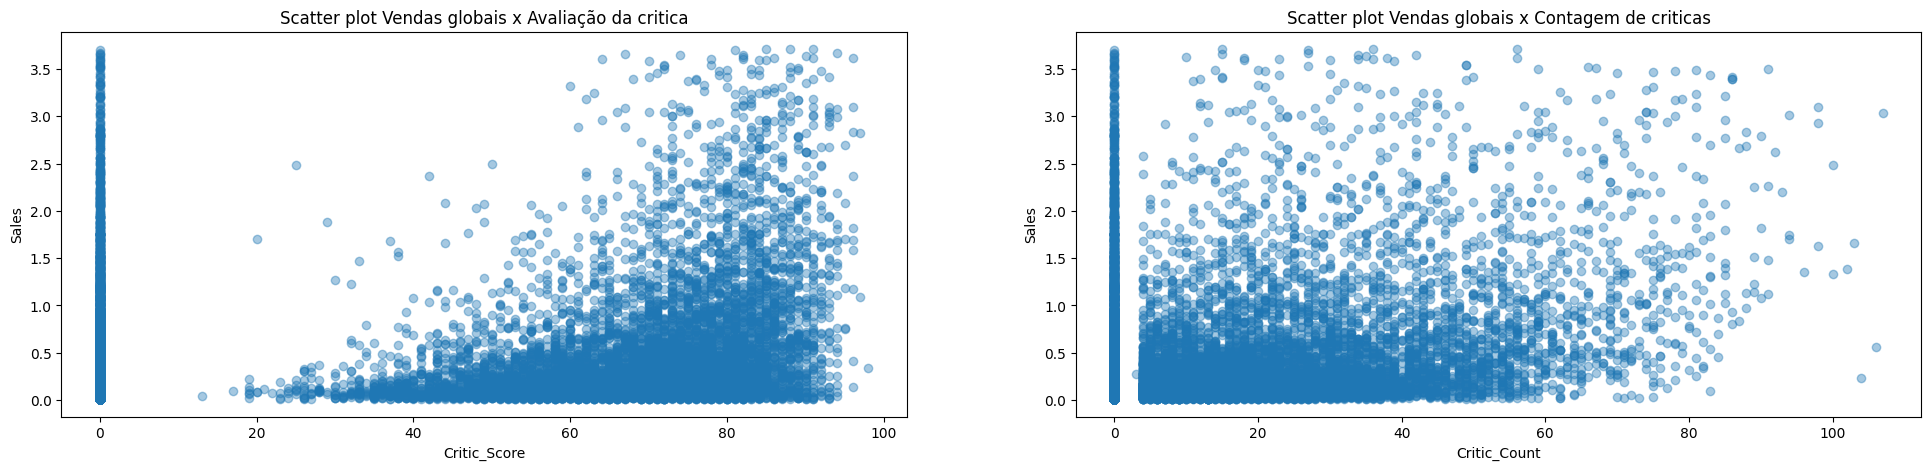

In [68]:
fig, axes = plt.subplots(1, 2, figsize=(24, 5))

df_fi = df[df["Global_Sales"] > 0]
# df_fi = df_fi[df_fi["Global_Sales"] < 0.5]
# df_fi = df_fi[df_fi["Critic_Score"] > 0]

axes[0].scatter( 
  df_fi['Critic_Score'],
  df_fi['Global_Sales'],

  # cmap='viridis',
  alpha=.4
)

axes[0].set_xlabel('Critic_Score')
axes[0].set_ylabel('Sales')

axes[0].set_title('Scatter plot Vendas globais x Avaliação da critica')

# contagem de criticas
axes[1].scatter( 

  df_fi['Critic_Count'],
  df_fi['Global_Sales'],

  alpha=.4
)

axes[1].set_xlabel('Critic_Count')
axes[1].set_ylabel('Sales')

axes[1].set_title('Scatter plot Vendas globais x Contagem de criticas')
plt.show()

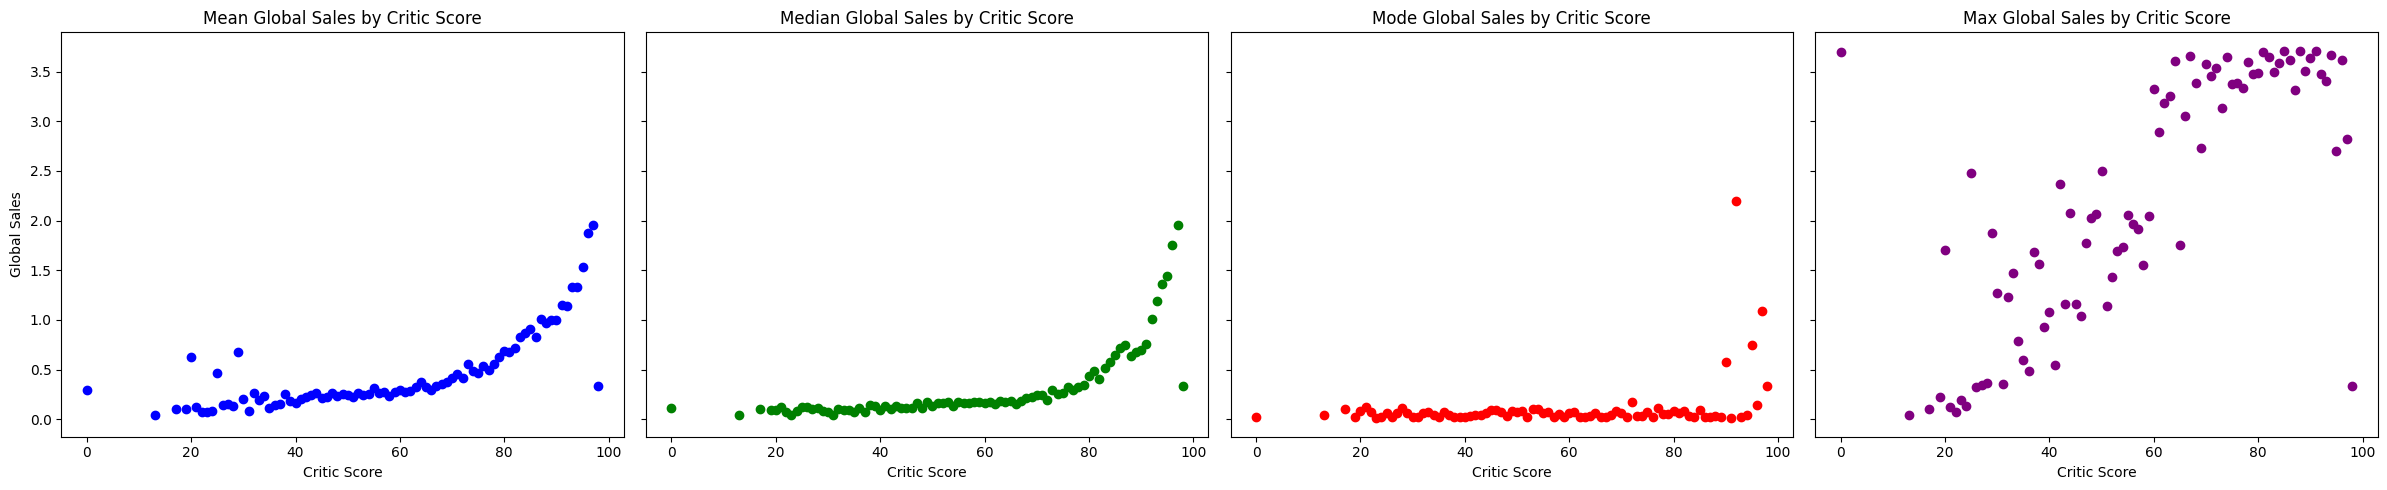

In [69]:
# Group by Critic_Score and calculate mean, median, mode, and min of Global_Sales
mean_sales =   df_fi.groupby('Critic_Score')['Global_Sales'].mean().reset_index()
median_sales = df_fi.groupby('Critic_Score')['Global_Sales'].median().reset_index()
mode_sales =   df_fi.groupby('Critic_Score')['Global_Sales'].apply(lambda x: x.mode().iloc[0]).reset_index()
max_sales =    df_fi.groupby('Critic_Score')['Global_Sales'].max().reset_index()
# Create a figure with 4 subplots side by side
fig, axes = plt.subplots(1, 4, figsize=(24, 5), sharey=True)

# Mean chart
axes[0].scatter(mean_sales['Critic_Score'], mean_sales['Global_Sales'], color='blue')
axes[0].set_title('Mean Global Sales by Critic Score')
axes[0].set_xlabel('Critic Score')
axes[0].set_ylabel('Global Sales')

# Median chart
axes[1].scatter(median_sales['Critic_Score'], median_sales['Global_Sales'], color='green')
axes[1].set_title('Median Global Sales by Critic Score')
axes[1].set_xlabel('Critic Score')

# Mode chart
axes[2].scatter(mode_sales['Critic_Score'], mode_sales['Global_Sales'], color='red')
axes[2].set_title('Mode Global Sales by Critic Score')
axes[2].set_xlabel('Critic Score')

# Min chart
axes[3].scatter(max_sales['Critic_Score'], max_sales['Global_Sales'], color='purple')
axes[3].set_title('Max Global Sales by Critic Score')
axes[3].set_xlabel('Critic Score')

# Display the plots
plt.tight_layout()
plt.show()

/tmp/ipykernel_402498/3479053195.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


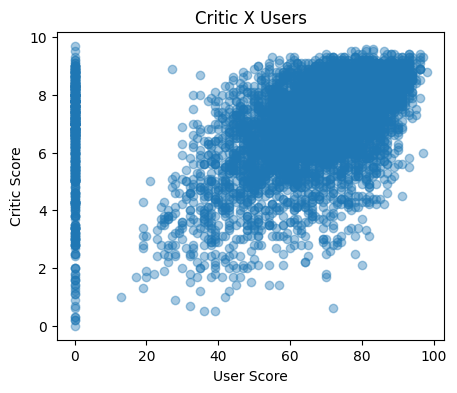

In [23]:
fdf = df

plt.figure(figsize=(5, 4))
plt.scatter( 
  fdf['Critic_Score'],
  fdf['User_Score'],

  cmap='viridis',
  alpha=.4
)

plt.ylabel('Critic Score')
plt.xlabel('User Score')

plt.title('Critic X Users')

plt.show()

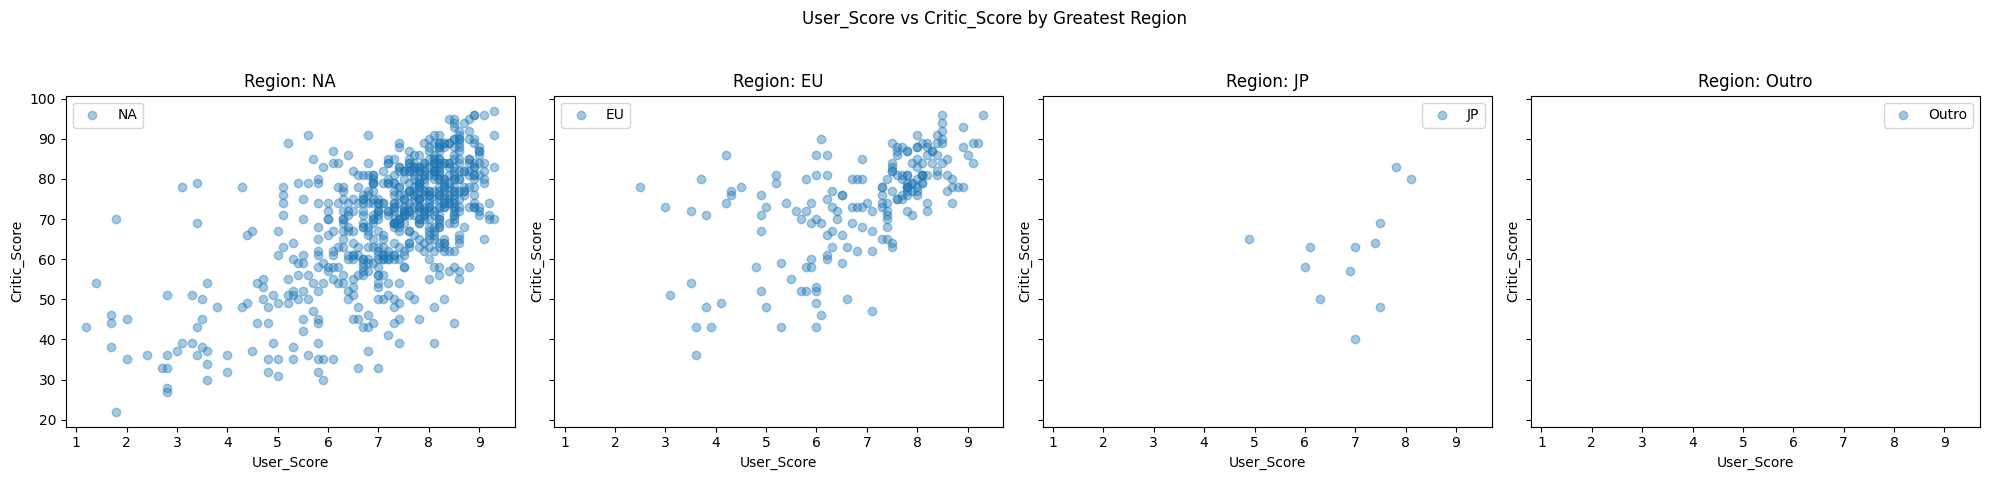

In [74]:
df_fi = df[df["Global_Sales"] > 0]
df_fi = df_fi[df_fi["Critic_Score"] > 0]

# Plot settings
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharex=True, sharey=True)
fig.suptitle("User_Score vs Critic_Score by Greatest Region")

for i, region in enumerate(["NA", "EU", "JP", "Outro"]):
    ax = axes[i]

    filtered_df = df_fi[df_fi["Greatest"] == region]

    filtered_df = filtered_df[ filtered_df[ "Genre" ] == "Shooter"  ]

    ax.scatter(
        filtered_df["User_Score"], 
        filtered_df["Critic_Score"], 
        label=region, alpha=0.4
    )
    ax.set_title(f"Region: {region}")
    ax.set_xlabel("User_Score")
    ax.set_ylabel("Critic_Score")
    ax.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the suptitle
plt.show()

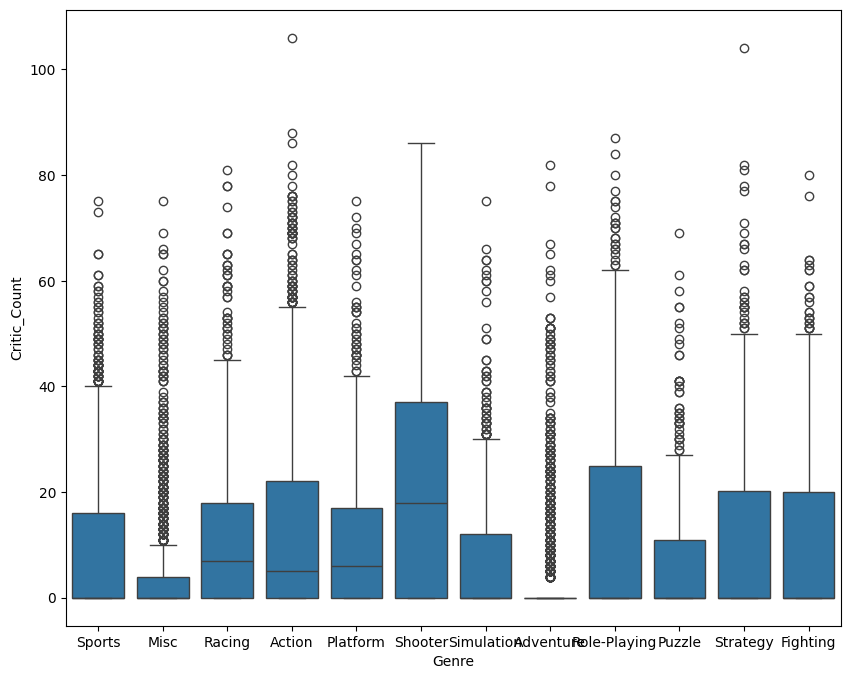

In [40]:
plt.figure(figsize=(10,8))
# df_fi = df[ df["Global_Sales"] > 0 ]
# df_fi = df[ df["Global_Sales"] < 1.0 ]
ax = sns.boxplot(
    x = 'Genre', 
    y="Critic_Count", 
    data=df_fi
)
plt.show()

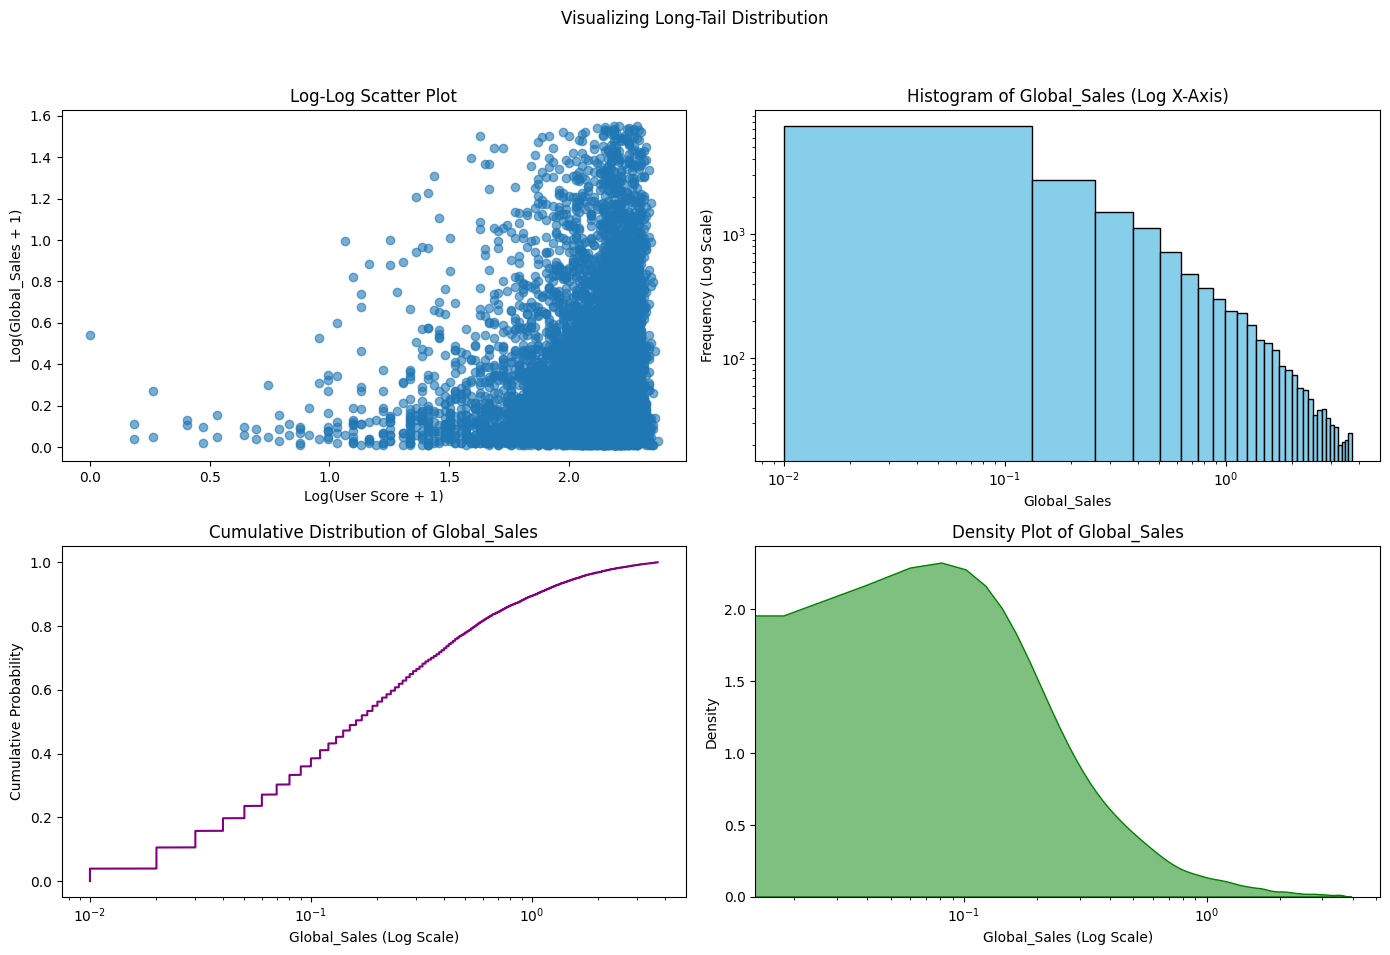

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Visualizing Long-Tail Distribution")

# 1. Log-Log Scatter Plot
axes[0, 0].scatter(np.log1p(df["User_Score"]), np.log1p(df["Global_Sales"]), alpha=0.6)
axes[0, 0].set_title("Log-Log Scatter Plot")
axes[0, 0].set_xlabel("Log(User Score + 1)")
axes[0, 0].set_ylabel("Log(Global_Sales + 1)")

# 2. Histogram of Sales with Log-Scaled X-Axis
axes[0, 1].hist(df["Global_Sales"], bins=30, color='skyblue', edgecolor='black', log=True)
axes[0, 1].set_xscale('log')
axes[0, 1].set_title("Histogram of Global_Sales (Log X-Axis)")
axes[0, 1].set_xlabel("Global_Sales")
axes[0, 1].set_ylabel("Frequency (Log Scale)")

# 3. Cumulative Distribution Plot
sorted_sales = np.sort(df["Global_Sales"])
cdf = np.arange(len(sorted_sales)) / float(len(sorted_sales))
axes[1, 0].plot(sorted_sales, cdf, color='purple')
axes[1, 0].set_xscale('log')
axes[1, 0].set_title("Cumulative Distribution of Global_Sales")
axes[1, 0].set_xlabel("Global_Sales (Log Scale)")
axes[1, 0].set_ylabel("Cumulative Probability")

# 4. Kernel Density Estimate (KDE) of Global_Sales
sns.kdeplot(df["Global_Sales"], ax=axes[1, 1], fill=True, color='green', alpha=0.5)
axes[1, 1].set_xscale('log')
axes[1, 1].set_title("Density Plot of Global_Sales")
axes[1, 1].set_xlabel("Global_Sales (Log Scale)")
axes[1, 1].set_ylabel("Density")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

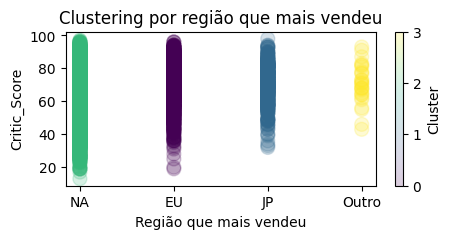

In [21]:
# from sklearn.cluster import KMeans
# from sklearn.linear_model import LinearRegression
from kmodes.kmodes import KModes 

# Colunas para embasar a clusterização
X = df[[ "Greatest" ]]

# Numero de clusters
n_clusters = 4

cluster_k = KModes( n_clusters=n_clusters, random_state=42 )
# cluster_k = KMeans( n_clusters=n_clusters, random_state=42 )

df['Cluster'] = cluster_k.fit_predict(X)

plt.figure(figsize=(5, 2))
plt.scatter( 
  df['Greatest'],
  df['Critic_Score'],

  c=df['Cluster'],
  cmap='viridis',
  s=100,
  alpha=0.2 
)

plt.xlabel('Região que mais vendeu')
plt.ylabel('Critic_Score')

plt.colorbar(label='Cluster')
plt.title('Clustering por região que mais vendeu')

plt.show()

In [22]:
# Transforma colunas categóricas em valores numéricos
# necessários para utilização de árvore de decisão

# df["Publisher"] = df["Publisher"].fillna("NA").astype('category').cat.codes
# df["Platform"]  = df["Platform"].fillna("NA").astype('category').cat.codes
# df["Genre"]     = df["Genre"].fillna("NA").astype('category').cat.codes
# df["Developer"] = df["Developer"].fillna("NA").astype('category').cat.codes
# df["Greatest"]  = df["Greatest"].astype('category').cat.codes
# df["Rating"]    = df["Rating"].astype('category').cat.codes

# Preenche os NAs com 0
df["Critic_Score"] = df["Critic_Score"].fillna(0)
df["Critic_Count"] = df["Critic_Count"].fillna(0)
df["JP_Sales"]     = df["JP_Sales"].fillna(0)

# df = df.dropna()

df['Critic_Classification'] = pd.cut(df['Critic_Score'], bins=10, labels=[x for x in range(0, 10)] )
df['Critic_Count_Classification'] = pd.cut(df['Critic_Count'], bins=4, labels=[1, 2, 3, 4])

# df.fillna("NA")
df["Year_of_Release"] = df["Year_of_Release"].fillna(2000);

print( df[["Critic_Score", "Critic_Classification"]] )


       Critic_Score Critic_Classification
335            85.0                     8
336            91.0                     9
337            88.0                     8
338            81.0                     8
339             0.0                     0
...             ...                   ...
16714           0.0                     0
16715           0.0                     0
16716           0.0                     0
16717           0.0                     0
16718           0.0                     0

[16384 rows x 2 columns]
